<a href="https://colab.research.google.com/github/aleynakirmizi/ML-projects/blob/main/zaman_serileri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import statsmodels

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [ ]:
df["Date"] = pd.to_datetime(df["Date"],unit="ms")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2956 non-null   datetime64[ns]
 1   Open       2956 non-null   float64       
 2   High       2956 non-null   float64       
 3   Low        2956 non-null   float64       
 4   Close      2956 non-null   float64       
 5   Adj Close  2956 non-null   float64       
 6   Volume     2956 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 161.8 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2956.0,1.386913e+02,2.500448e+02,3.228,1.962700e+01,4.665700e+01,6.805700e+01,1.234410e+03
High,2956.0,1.417716e+02,2.558632e+02,3.326,2.040200e+01,4.748700e+01,6.935750e+01,1.243490e+03
Low,2956.0,1.354260e+02,2.437742e+02,2.996,1.912750e+01,4.582000e+01,6.691150e+01,1.217000e+03
Close,2956.0,1.387622e+02,2.501231e+02,3.160,1.961500e+01,4.654500e+01,6.810400e+01,1.229910e+03
Adj Close,2956.0,1.387622e+02,2.501231e+02,3.160,1.961500e+01,4.654500e+01,6.810400e+01,1.229910e+03
Volume,2956.0,3.131449e+07,2.798383e+07,592500.000,1.310288e+07,2.488680e+07,3.973875e+07,3.046940e+08


In [ ]:
liste=[]
for i in range(len(df["Date"])):
    if df["Date"][i].year in liste:
      pass
    else:
      liste.append(df["Date"][i].year)
liste

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

# Data Analysis

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df.Date, y = df.High,
                    mode='lines',
                    name='High',
                    marker_color = '#2CA02C',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = df.Date, y = df.Low,
                    mode='lines',
                    name='Low',
                    marker_color = '#D62728',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = df.Date, y = df.Open,
                    mode='lines',
                    name='Open',
                    marker_color = '#FF7F0E',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = df.Date, y = df.Close,
                    mode='lines',
                    name='Close',
                    marker_color = '#1F77B4'))
fig.update_layout(
    title='Tesla history',
    titlefont_size = 28,
    
    xaxis = dict(
        title='Date',
        tickmode="array",
        tickvals=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        ticktext=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        titlefont_size=16,
        tickfont_size=14),
    
    height = 800,
    
    yaxis=dict(
        title='Stock',
        titlefont_size=16,
        tickfont_size=14),
    
    legend=dict(
        y=0,
        x=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'))

fig.show()

In [ ]:
df_years = pd.DataFrame(liste,columns=["year"])

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'][:130],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15d", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'][1891:2382],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15d", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.update_layout(
    title='Tesla history',
    titlefont_size = 28,
    
    xaxis = dict(
        title='Date',
        tickmode="array",
        tickvals=(df['Date'][1891:2382]),
        ticktext=df['Date'][1891:2382],
        titlefont_size=2,
        tickfont_size=2))

fig.show()

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'][1891:2141],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15d", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
liste=[]
for i in range(len(df["Date"])):
    if df["Date"][i].year in liste:
      pass
    else:
      liste.append(df["Date"][i].year)
liste

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [ ]:
liste=[]
for i in range(len(df["Date"])):
    if  df["Date"][i].year==2018:
      liste.append(i)
    else:
      pass
liste

[1891,
 1892,
 1893,
 1894,
 1895,
 1896,
 1897,
 1898,
 1899,
 1900,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025,
 2026,
 2027,
 2028,
 2029,
 2030,
 2031,
 2032,
 2033,

In [ ]:
df["Date"][1].year

2010

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [ ]:
ts_log = pd.DataFrame(columns=["Date","Open"])
ts_log["Date"] = df["Date"]
ts_log["Open"] = df["Open"]
# Set the column 'Date' as index (skip if already done)
ts_log = ts_log.set_index('Date')
# Specify datetime frequency
ts_log.dropna(inplace=True)
ts_log = ts_log.asfreq('D')
ts_log.dropna(inplace=True)


In [ ]:
ts_log.isna().sum()

Open    0
dtype: int64

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log.Open.values,freq=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



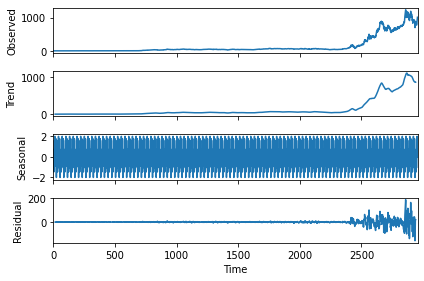

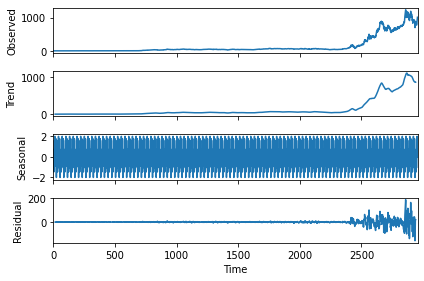

In [ ]:
decomposition.plot()

In [ ]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [ ]:
ts_log_ = pd.DataFrame(columns=["Date","Close"])
ts_log_["Date"]= df["Date"]
ts_log_["Close"] = df["Close"]
ts_log_ = ts_log_.set_index('Date')
ts_log_


,Close
Date,
2010-06-29,4.778000
2010-06-30,4.766000
2010-07-01,4.392000
2010-07-02,3.840000
2010-07-06,3.222000
...,...
2022-03-18,905.390015
2022-03-21,921.159973
2022-03-22,993.979980


In [ ]:
ts_log_.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4287 entries, 2010-06-29 to 2022-03-24
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   0 non-null      float64
dtypes: float64(1)
memory usage: 67.0 KB


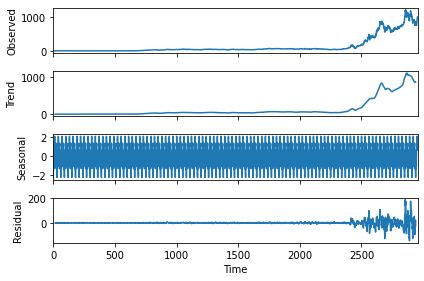

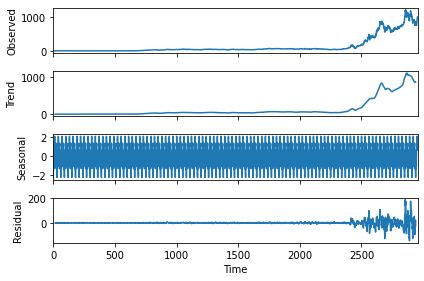

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log_.Close.values,freq=30)
decomposition.plot()

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [ ]:
fig = go.Figure(data=[go.Candlestick(x=(df['Date'][1891:2141]).astype("str"),
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15d", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=4, label="4m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()

In [ ]:
fig = px.line(df, x='Date', y='Open', title='Tesla Stock with Range Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=4, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="todate"),
            dict(count=4, label="4y", step="year", stepmode="todate")

        ])
    )
)
fig.show()

In [ ]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['month_year'] = df['Date'].dt.to_period('M')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,month_year
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,2010,6,2010-06
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,2010,6,2010-06
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,2010,7,2010-07
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,2010,7,2010-07
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,2010,7,2010-07


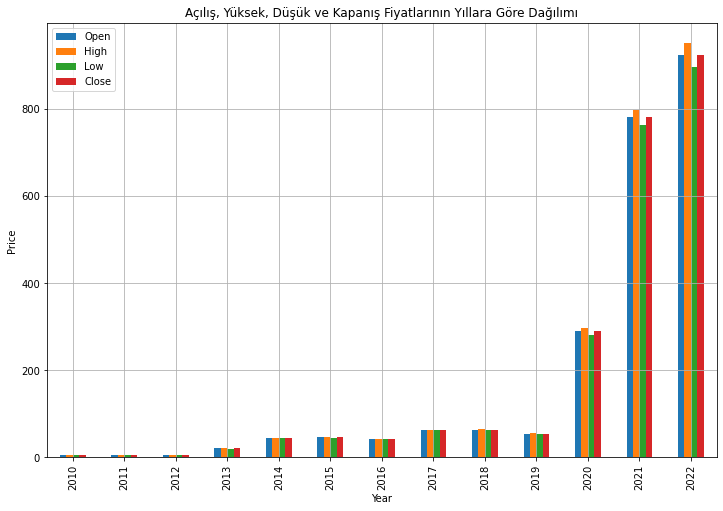

In [ ]:
import matplotlib.pyplot as plt
stocks_year = df.groupby(by='year').mean()
stocks_year[['Open','High','Low','Close']].plot(kind = 'bar', figsize = (12,8), grid = True)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Açılış, Yüksek, Düşük ve Kapanış Fiyatlarının Yıllara Göre Dağılımı')
plt.show()

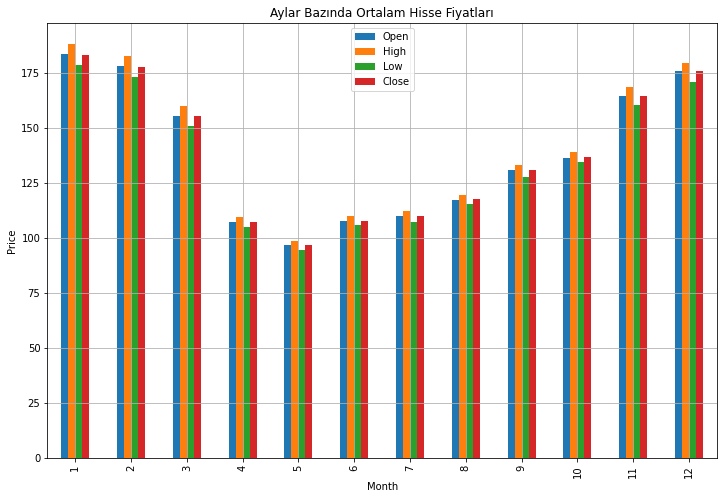

In [ ]:
stocks_month = df.groupby(by='month').mean()
stocks_month[['Open','High','Low','Close']].plot(kind = 'bar', figsize = (12,8), grid = True)
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Aylar Bazında Ortalam Hisse Fiyatları')
plt.show()

In [ ]:
df.isna().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
year          0
month         0
month_year    0
dtype: int64

In [ ]:
df.drop(columns=["year","month","month_year"],inplace=True)

In [ ]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2956 non-null   datetime64[ns]
 1   Open       2956 non-null   float64       
 2   High       2956 non-null   float64       
 3   Low        2956 non-null   float64       
 4   Close      2956 non-null   float64       
 5   Adj Close  2956 non-null   float64       
 6   Volume     2956 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 161.8 KB


In [ ]:
import numpy as np
from functools import reduce
x = [4, 8, 9, 6, 15, 2]
y = [1, 6, 7, 9, 2, 10]
def mean(data):
    return reduce(lambda a, b: a + b, data) / len(data)
def cov(x,y):
    if len(x) != len(y):
        return
    #değişkenlerin ortalamaya göre düzeltilmiş çarpımlar toplamı
    sum_of = 0
    for i,j in zip(x,y):
        sum_of += (i - mean(x)) * (j - mean(y))
    return sum_of/(len(x)-1)


In [ ]:
cov(df["Open"],df["Close"])

62494.873880609804

In [ ]:
cov(df["Open"],df["High"])

63959.76824818193

In [ ]:
cov(df["Open"],df["Low"])

60931.150667236

In [ ]:
cov(df["Open"],df["Volume"])

627997297.6095582

In [ ]:
cov(df["Close"],df["Low"])

60953.41381697667

In [ ]:
cov(df["Close"],df["Volume"])

634158494.1674892

In [ ]:
df.columns[1::]

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
fields= ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for i in fields:
  for j in fields:
    if i==j:
      pass
    else:
      print("Kovaryans: ",i," - ",j,":",cov(df[i],df[j]))
      

Kovaryans:  Open  -  High : 63959.76824818193
Kovaryans:  Open  -  Low : 60931.150667236
Kovaryans:  Open  -  Close : 62494.873880609804
Kovaryans:  Open  -  Adj Close : 62494.873880609804
Kovaryans:  Open  -  Volume : 627997297.6095582
Kovaryans:  High  -  Open : 63959.76824818193
Kovaryans:  High  -  Low : 62347.575693472165
Kovaryans:  High  -  Close : 63975.93188969259
Kovaryans:  High  -  Adj Close : 63975.93188969259
Kovaryans:  High  -  Volume : 670357882.1331077
Kovaryans:  Low  -  Open : 60931.150667236
Kovaryans:  Low  -  High : 62347.575693472165
Kovaryans:  Low  -  Close : 60953.41381697667
Kovaryans:  Low  -  Adj Close : 60953.41381697667
Kovaryans:  Low  -  Volume : 586031066.7127129
Kovaryans:  Close  -  Open : 62494.873880609804
Kovaryans:  Close  -  High : 63975.93188969259
Kovaryans:  Close  -  Low : 60953.41381697667
Kovaryans:  Close  -  Adj Close : 62561.57246495372
Kovaryans:  Close  -  Volume : 634158494.1674892
Kovaryans:  Adj Close  -  Open : 62494.873880609804

In [ ]:
df.cov()

,Open,High,Low,Close,Adj Close,Volume
Open,6.252242e+04,6.395977e+04,6.093115e+04,6.249487e+04,6.249487e+04,6.279973e+08
High,6.395977e+04,6.546600e+04,6.234758e+04,6.397593e+04,6.397593e+04,6.703579e+08
Low,6.093115e+04,6.234758e+04,5.942584e+04,6.095341e+04,6.095341e+04,5.860311e+08
Close,6.249487e+04,6.397593e+04,6.095341e+04,6.256157e+04,6.256157e+04,6.341585e+08
Adj Close,6.249487e+04,6.397593e+04,6.095341e+04,6.256157e+04,6.256157e+04,6.341585e+08
Volume,6.279973e+08,6.703579e+08,5.860311e+08,6.341585e+08,6.341585e+08,7.830947e+14


In [ ]:
df.cov().iloc[1]

Open         6.395977e+04
High         6.546600e+04
Low          6.234758e+04
Close        6.397593e+04
Adj Close    6.397593e+04
Volume       6.703579e+08
Name: High, dtype: float64

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [ ]:
df=df.set_index('Date')

# Time Series Tests

ADF Test

In [ ]:
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
import matplotlib.pyplot as plt


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_log_["Close"],autolag="AIC")
print("ADF Statistic :%f" % result[0])
print("p value : %f"%result[1])
print("Critical Values: ")
for key,value in result[4].items():
  print("\t%s: %.3f"%(key,value))
  if result[0]<result[4]["5%"]:
    print("Strong evidence against the null hypothesis reject the null hypothesis - Data has no root and is stationary")
  else:
    print("Weak evidence against null hypothesis, time series has a unit root,indicating it is non-stationary.")

ADF Statistic :1.423942
p value : 0.997220
Critical Values: 
	1%: -3.433
Weak evidence against null hypothesis, time series has a unit root,indicating it is non-stationary.
	5%: -2.863
Weak evidence against null hypothesis, time series has a unit root,indicating it is non-stationary.
	10%: -2.567
Weak evidence against null hypothesis, time series has a unit root,indicating it is non-stationary.


KPSS Test

In [ ]:
sts.kpss(ts_log_['Close'], regression='c',lags='legacy')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning:

p-value is smaller than the indicated p-value



(4.867567775432748,
 0.01,
 28,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})


*   Opening price dataset, as, the test statistics is greater than the critical values, the null hypothesis is rejected, thus the process is non-stationary.





**Autocorrelation**

Analysed with the first 40 lags,which means the last 40 periods before the current one right. 

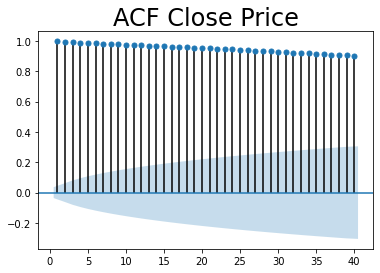

In [ ]:
sgt.plot_acf(ts_log_['Close'], lags = 40, zero = False)
plt.title("ACF Close Price", size = 24)
plt.show()

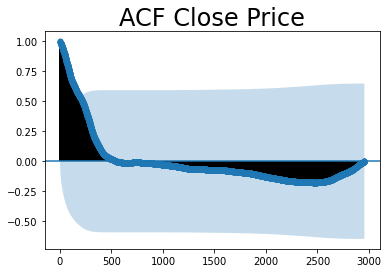

In [ ]:
sgt.plot_acf(ts_log_['Close'], lags = 2955, zero = False)
plt.title("ACF Close Price", size = 24)
plt.show()

**Partial auto correlation**

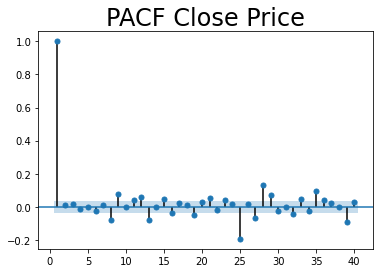

In [ ]:
sgt.plot_pacf(ts_log_['Close'], lags = 40, zero = False, method = ('ols'))
plt.title("PACF Close Price", size = 24)
plt.show()

# Making the Time Series Stationary

**Differencing**

In [ ]:
new_df =  pd.DataFrame(ts_log_['Close'])
new_df['Differencing'] = list((ts_log_['Close']- ts_log_['Close'].shift(1).fillna(method='bfill')))

NameError: ignored

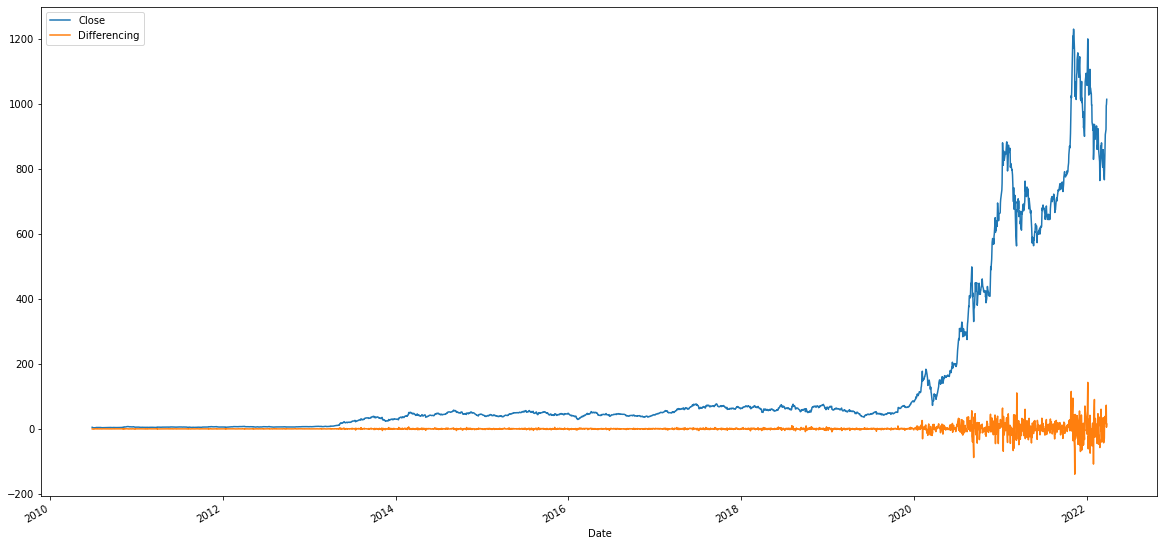

In [ ]:
new_df.plot(figsize=(20,10))
plt.title('Comparing after performing Differencing on Closing Price', fontsize=25)
plt.xlabel('Time',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.legend(fontsize = 20, loc=2)
plt.show()

In [ ]:
new_df

,Close,Differencing
Date,,
2010-06-29,4.778000,0.000000
2010-06-30,4.766000,-0.012000
2010-07-01,4.392000,-0.374000
2010-07-02,3.840000,-0.552000
2010-07-06,3.222000,-0.618000
...,...,...
2022-03-18,905.390015,33.790039
2022-03-21,921.159973,15.769958
2022-03-22,993.979980,72.820007


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(new_df["Differencing"],autolag="AIC")
print("ADF Statistic :%f" % result[0])
print("p value : %f"%result[1])
print("Critical Values: ")
for key,value in result[4].items():
  print("\t%s: %.3f"%(key,value))
  if result[0]<result[4]["5%"]:
    print("Strong evidence against the null hypothesis reject the null hypothesis - Data has no root and is stationary")
  else:
    print("Weak evidence against null hypothesis, time series has a unit root,indicating it is non-stationary.")

ADF Statistic :-9.846583
p value : 0.000000
Critical Values: 
	1%: -3.433
Strong evidence against the null hypothesis reject the null hypothesis - Data has no root and is stationary
	5%: -2.863
Strong evidence against the null hypothesis reject the null hypothesis - Data has no root and is stationary
	10%: -2.567
Strong evidence against the null hypothesis reject the null hypothesis - Data has no root and is stationary


**Seasonal Differencing**

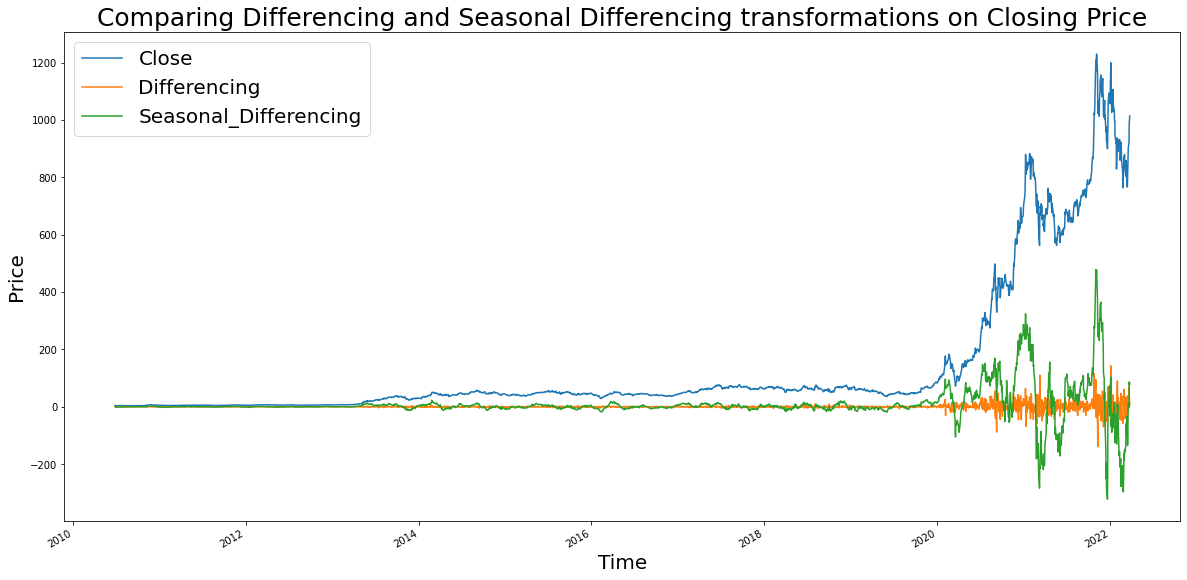

In [ ]:
import matplotlib.pyplot as plt
new_df['Seasonal_Differencing'] = list((ts_log_['Close'] - ts_log_['Close'].shift(30).fillna(method='bfill')))
new_df.plot(figsize=(20,10))
plt.title('Comparing Differencing and Seasonal Differencing transformations on Closing Price', fontsize=25)
plt.xlabel('Time',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.legend(fontsize = 20, loc=2)
plt.show()

In [ ]:
new_df

,Close,Differencing,Seasonal_Differencing
Date,,,
2010-06-29,4.778000,0.000000,0.000000
2010-06-30,4.766000,-0.012000,-0.012000
2010-07-01,4.392000,-0.374000,-0.386000
2010-07-02,3.840000,-0.552000,-0.938000
2010-07-06,3.222000,-0.618000,-1.556000
...,...,...,...
2022-03-18,905.390015,33.790039,14.250000
2022-03-21,921.159973,15.769958,-2.160034
2022-03-22,993.979980,72.820007,86.639953


**Transformation**

In [ ]:
# new_df.drop(columns=["log_transformed"],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log



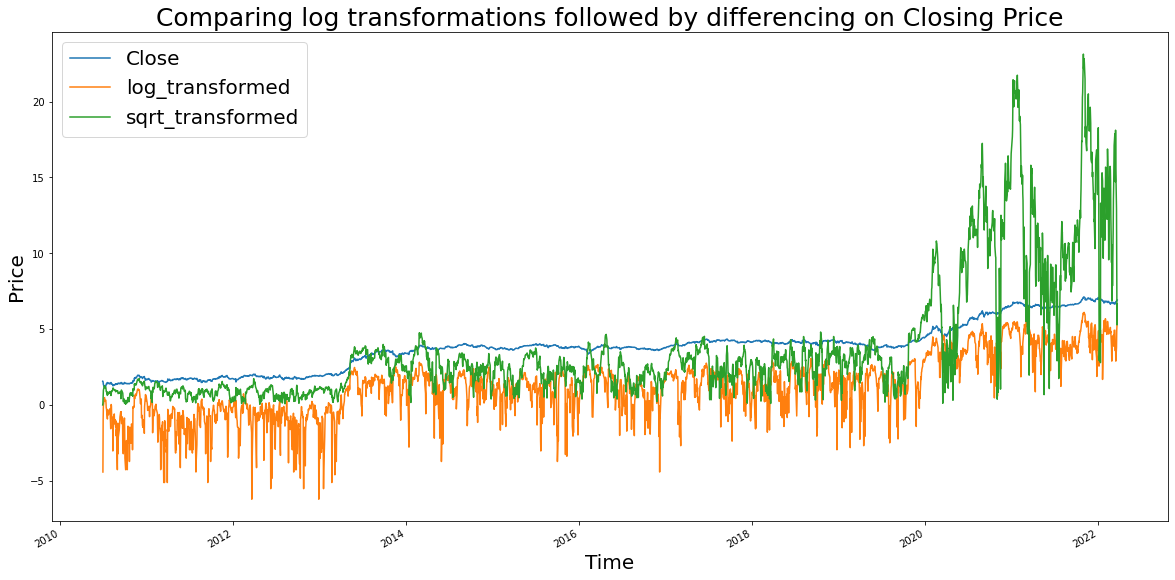

In [ ]:
transform_log =  pd.DataFrame(np.log(ts_log_['Close']))
transform_log['log_transformed'] = list(np.log(abs(ts_log_['Close'] - ts_log_['Close'].shift(21).fillna(method='bfill'))))
transform_log['sqrt_transformed'] = list(np.sqrt(abs(ts_log_['Close'] - ts_log_['Close'].shift(51).fillna(method='bfill'))))
transform_log.plot(figsize=(20,10))

plt.title('Comparing log transformations followed by differencing on Closing Price', fontsize=25)
plt.xlabel('Time',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.legend(fontsize = 20, loc=2)

plt.show()


In [ ]:
import numpy as np
transform_log.replace([np.inf,-np.inf],0,inplace=True)


In [ ]:
transform_log

,Close,log_transformed,sqrt_transformed
Date,,,
2010-06-29,1.564022,0.000000,0.000000
2010-06-30,1.561507,-4.422849,0.109545
2010-07-01,1.479785,-0.951918,0.621289
2010-07-02,1.345472,-0.064005,0.968504
2010-07-06,1.170002,0.442118,1.247397
...,...,...,...
2022-03-18,6.808366,2.890372,15.626898
2022-03-21,6.825634,3.802431,12.921301
2022-03-22,6.901717,4.919981,8.409517


In [ ]:
compare = []
for i in range(5):
    compare.append([])
    
compare[0] = (sts.adfuller(new_df['Close']))[:4]
compare[1] = (sts.adfuller(new_df['Differencing']))[:4]
compare[2] = (sts.adfuller(new_df['Seasonal_Differencing']))[:4]
compare[3]=(sts.adfuller(transform_log['log_transformed']))[:4]
compare[4]=(sts.adfuller(transform_log['sqrt_transformed']))[:4]

compare = pd.DataFrame(compare)
compare = compare.rename(columns={0: 'adf_Test_statistics',1: 'p_value',2: 'usedlag',3: 'n_obs'},
                    index={0: 'Open',1: 'Differencing',2: 'Seasonal_Differencing',3:"Log_Transformed",4:"Sqrt_Transformed"})
compare

,adf_Test_statistics,p_value,usedlag,n_obs
Open,1.423942,9.972202e-01,28,2927
Differencing,-9.846583,4.602450e-17,28,2927
Seasonal_Differencing,-9.493186,3.606609e-16,28,2927
Log_Transformed,-2.885952,4.700614e-02,22,2933
Sqrt_Transformed,-3.018542,3.319870e-02,28,2927


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

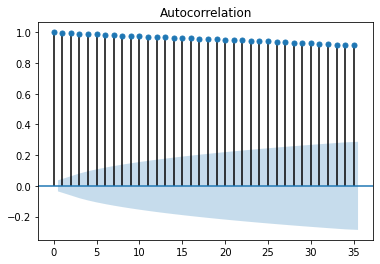

In [ ]:
acf = plot_acf(df['Close'].dropna())

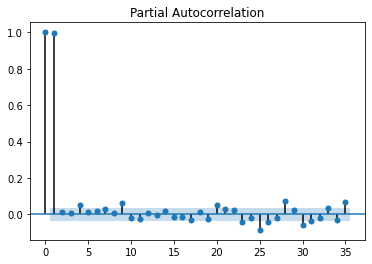

In [ ]:
pacf = plot_pacf(df['Close'])

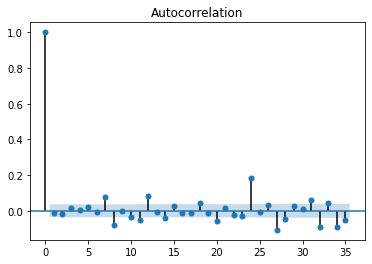

In [ ]:
acf = plot_acf(new_df['Differencing'].dropna())

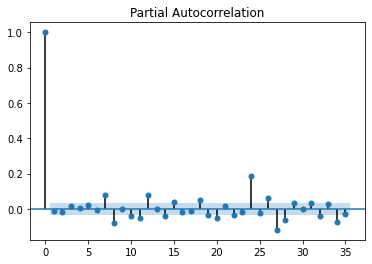

In [ ]:
pacf = plot_pacf(new_df['Differencing'].dropna())

# Predicting

Simple Moving Average

In [ ]:
df["Close: 10 Days Rolling"] = df["Close"].rolling(window=10,min_periods=1).mean()

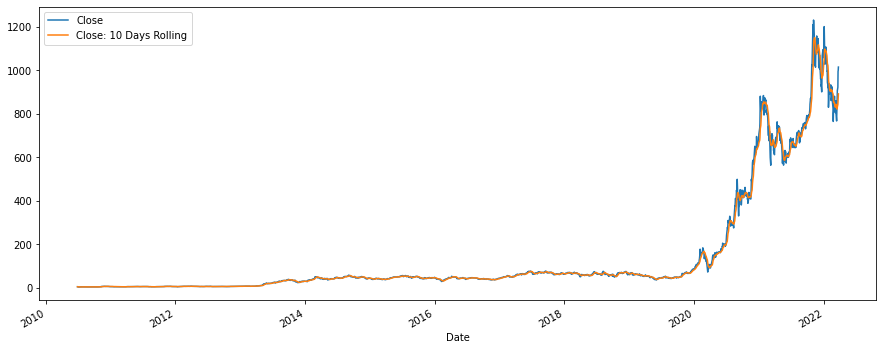

In [ ]:
df[["Close","Close: 10 Days Rolling"]].plot(figsize=(15,6))

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df.index, y = df.Close,
                    mode='lines',
                    name='Close',
                    marker_color = '#2CA02C',
                    visible = "legendonly"))

fig.add_trace(go.Scatter(x = df.index, y = df["Close: 10 Days Rolling"],
                    mode='lines',
                    name='10 days rolling',
                    marker_color = '#1F77B4'))
fig.update_layout(
    title='Close: 10 Days Rolling',
    titlefont_size = 28,
    
    xaxis = dict(
        title='Date',
        tickmode="array",
        tickvals=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        ticktext=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        titlefont_size=16,
        tickfont_size=14),
    yaxis=dict(
  title='Close Price USD ($)',
  titlefont_size=16,
  tickfont_size=14),
    
    height = 800,

    
    
    legend=dict(
        y=0,
        x=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'))

fig.show()
fig.write_html("/content/drive/MyDrive/file.html")

In [ ]:
df["Close: 30 Days Rolling"] = df["Close"].rolling(window=30,min_periods=1).mean()
df["Close: 50 Days Rolling"] = df["Close"].rolling(window=50,min_periods=1).mean()
df

,Open,High,Low,Close,Adj Close,Volume,Close: 10 Days Rolling,Close: 30 Days Rolling,Close: 50 Days Rolling
Date,,,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,4.778000,4.778000,4.778000
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,4.772000,4.772000,4.772000
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,4.645333,4.645333,4.645333
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,4.444000,4.444000,4.444000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,4.199600,4.199600,4.199600
...,...,...,...,...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500,830.707996,856.655998,903.872197
2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200,842.365991,856.583997,901.001398
2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500,859.323987,859.471995,900.341798


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df.index, y = df.Close,
                    mode='lines',
                    name='Close',
                    marker_color = '#2CA02C',
                    visible = "legendonly"))

fig.add_trace(go.Scatter(x = df.index, y = df["Close: 10 Days Rolling"],
                    mode='lines',
                    name='10 days rolling',
                    marker_color = '#1F77B4'))
fig.add_trace(go.Scatter(x = df.index, y = df["Close: 30 Days Rolling"],
                    mode='lines',
                    name='30 days rolling',
                    marker_color = '#D62728'))
fig.add_trace(go.Scatter(x = df.index, y = df["Close: 50 Days Rolling"],
                    mode='lines',
                    name='50 days rolling',
                    marker_color = '#FF7F0E'))
fig.update_layout(
    title='Close Days Rolling',
    titlefont_size = 28,
    
    xaxis = dict(
        title='Date',
        tickmode="array",
        tickvals=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        ticktext=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        titlefont_size=16,
        tickfont_size=14),
    yaxis=dict(
  title='Close Price USD ($)',
  titlefont_size=16,
  tickfont_size=14),
    
    height = 800,
    
    
    legend=dict(
        y=0,
        x=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'))

fig.show()



**Cumulative Moving Average**

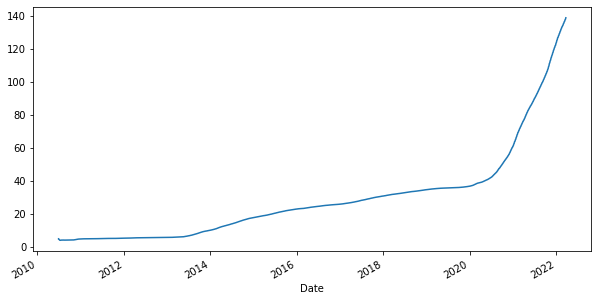

In [ ]:
df["Close"].expanding().mean().plot(figsize=(10,5))

**Exponential Weighted Moving Average**

In [ ]:
df["EMA_0.1"] = df["Close"].ewm(alpha=0.1,adjust=False).mean()
df["EMA_0.3"] = df["Close"].ewm(alpha=0.3,adjust=False).mean()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df.index, y = df.Close,
                    mode='lines',
                    name='Close',
                    marker_color = '#2CA02C',
                    visible = "legendonly"))

fig.add_trace(go.Scatter(x = df.index, y = df["EMA_0.1"],
                    mode='lines',
                    name='alpha=0.1',
                    marker_color = '#1F77B4'))
fig.add_trace(go.Scatter(x = df.index, y = df["EMA_0.3"],
                    mode='lines',
                    name='alpha=0.3',
                    marker_color = '#D62728'))

fig.update_layout(
    title='Exponential Weighted Moving Average',
    titlefont_size = 28,
    
    xaxis = dict(
        title='Date',
        tickmode="array",
        tickvals=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        ticktext=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        titlefont_size=16,
        tickfont_size=14),
    yaxis=dict(
  title='Close Price USD ($)',
  titlefont_size=16,
  tickfont_size=14),
    
    height = 800,
    
    
    legend=dict(
        y=0,
        x=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'))

fig.show()

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Close: 10 Days Rolling,Close: 30 Days Rolling,Close: 50 Days Rolling,EMA_0.1,EMA_0.3
Date,,,,,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,4.778000,4.778000,4.778000,4.778000,4.778000
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,4.772000,4.772000,4.772000,4.776800,4.774400
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,4.645333,4.645333,4.645333,4.738320,4.659680
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,4.444000,4.444000,4.444000,4.648488,4.413776
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,4.199600,4.199600,4.199600,4.505839,4.056243
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500,830.707996,856.655998,903.872197,847.375296,854.708390
2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200,842.365991,856.583997,901.001398,854.753764,874.643865
2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500,859.323987,859.471995,900.341798,868.676386,910.444700


**MAE-MAPE-MSE**

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
y_true=df["Close"]
column=["Close: 10 Days Rolling","Close: 30 Days Rolling","Close: 50 Days Rolling","EMA_0.1","EMA_0.3"]
for i in column:
  y_pred = df[i]
  mape=mean_absolute_percentage_error(y_true,y_pred)
  print("MAPE CLOSE and "+str(i).upper()+" = "+str(mape))

MAPE CLOSE and CLOSE: 10 DAYS ROLLING = 0.04331213148205131
MAPE CLOSE and CLOSE: 30 DAYS ROLLING = 0.079645408068026
MAPE CLOSE and CLOSE: 50 DAYS ROLLING = 0.10296716130735134
MAPE CLOSE and EMA_0.1 = 0.05285697769511736
MAPE CLOSE and EMA_0.3 = 0.02479999287461219


In [ ]:
y_true=df["Close"]
column=["Close: 10 Days Rolling","Close: 30 Days Rolling","Close: 50 Days Rolling","EMA_0.1","EMA_0.3"]
for i in column:
  y_pred = df[i]
  mae=mean_absolute_error(y_true,y_pred)
  print("MAE CLOSE and "+str(i).upper()+" = "+str(mae))

MAE CLOSE and CLOSE: 10 DAYS ROLLING = 6.751827974879718
MAE CLOSE and CLOSE: 30 DAYS ROLLING = 12.620249054641992
MAE CLOSE and CLOSE: 50 DAYS ROLLING = 16.83581430562821
MAE CLOSE and EMA_0.1 = 8.244819333625461
MAE CLOSE and EMA_0.3 = 3.8846627096573783


In [ ]:
y_true=df["Close"]
column=["Close: 10 Days Rolling","Close: 30 Days Rolling","Close: 50 Days Rolling","EMA_0.1","EMA_0.3"]
for i in column:
  y_pred = df[i]
  mse=mean_squared_error(y_true,y_pred)
  print("MSE CLOSE and "+str(i).upper()+" = "+str(mse))

MSE CLOSE and CLOSE: 10 DAYS ROLLING = 351.0845764375154
MSE CLOSE and CLOSE: 30 DAYS ROLLING = 1117.3035487606528
MSE CLOSE and CLOSE: 50 DAYS ROLLING = 1897.3872750867315
MSE CLOSE and EMA_0.1 = 512.1439148122572
MSE CLOSE and EMA_0.3 = 118.48450587951996


In [ ]:
df_tesla = pd.read_csv("/content/drive/MyDrive/TSLA.csv")
df_tesla

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [ ]:
df_tesla["Date"] = pd.to_datetime(df_tesla["Date"])

In [ ]:
df_close=df_tesla[["Date","Close"]]
df_close

,Date,Close
0,2010-06-29,4.778000
1,2010-06-30,4.766000
2,2010-07-01,4.392000
3,2010-07-02,3.840000
4,2010-07-06,3.222000
...,...,...
2951,2022-03-18,905.390015
2952,2022-03-21,921.159973
2953,2022-03-22,993.979980
2954,2022-03-23,999.109985


In [ ]:
ts_log_.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2022-03-11', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24'],
              dtype='datetime64[ns]', name='Date', length=2956, freq=None)

In [ ]:
train_data, test_data = ts_log_[0:int(len(df)*0.8)], ts_log_[int(len(df)*0.8):]
test_data

,Close
Date,
2019-11-18,69.998001
2019-11-19,71.903999
2019-11-20,70.444000
2019-11-21,70.966003
2019-11-22,66.608002
...,...
2022-03-18,905.390015
2022-03-21,921.159973
2022-03-22,993.979980


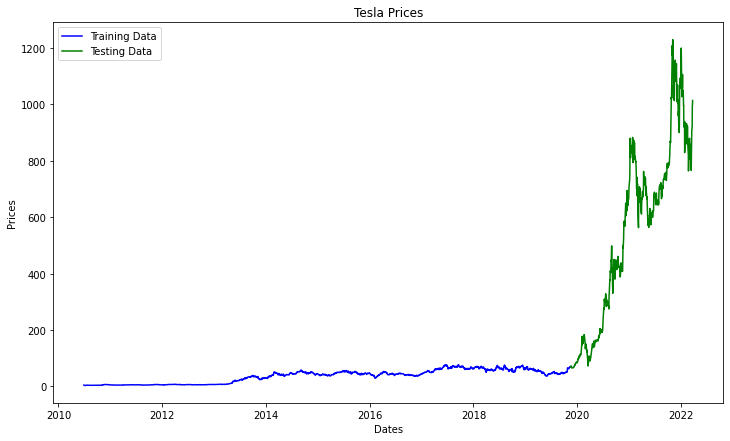

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
plt.title('Tesla Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data, 'blue', label='Training Data')
plt.plot(test_data, 'green', label='Testing Data')
plt.legend()

**ARIMA**





In [ ]:
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values


In [ ]:
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(7,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)

<class 'list'>
Testing Mean Squared Error: 653.502


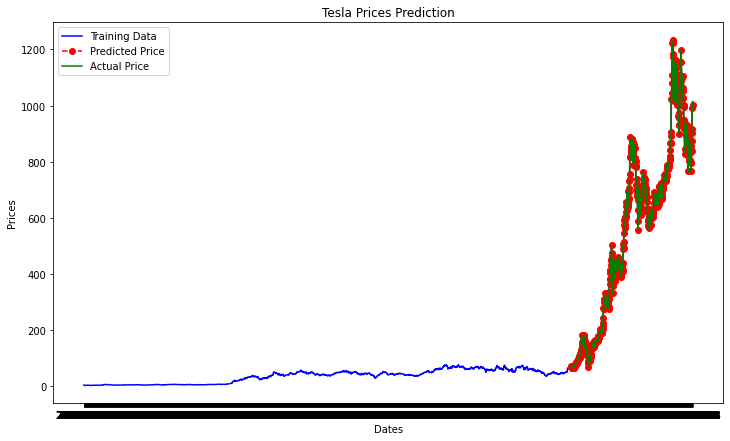

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(ts_log_['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='red', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data["Close"], color='green', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [ ]:
len(history)

2956

In [ ]:
train_data

,Close
Date,
2010-06-29,4.778000
2010-06-30,4.766000
2010-07-01,4.392000
2010-07-02,3.840000
2010-07-06,3.222000
...,...
2019-11-11,69.017998
2019-11-12,69.986000
2019-11-13,69.222000


In [ ]:
test_data

,Close
Date,
2019-11-18,69.998001
2019-11-19,71.903999
2019-11-20,70.444000
2019-11-21,70.966003
2019-11-22,66.608002
...,...
2022-03-18,905.390015
2022-03-21,921.159973
2022-03-22,993.979980
